# Gene activity

This notebook generates gene activities for mono- and co-cultures at T0 and T24.

# 0. load data

# 0.1. import general Python modules

In [1]:
import pandas, os, numpy

## 0.2. import MINER

In [2]:
# retrieve code from GitHub
if os.path.exists('miner_py3.py') == True:
    print('miner_py3.py already exists')
else:
    !wget https://raw.githubusercontent.com/MattWallScientist/miner3/master/miner/src/miner_py3.py

miner_py3.py already exists


In [3]:
import miner_py3 as miner

## 0.3 Paths to files

In [4]:
mechanistic_inference_results = '/Users/alomana/backups/cdi/miner_results_merged/mechanistic_inference_results/'
bicluster_membership_results = '/Users/alomana/backups/cdi/miner_results_merged/bicluster_membership_results/'

## 0.4 genes of interest

In [5]:
ccnd1 = "ENSG00000110092"
noxa = "ENSG00000141682"
bak = "ENSG00000030110"

## 0.4. load MINER network

In [6]:
regulonDf = pandas.read_csv(os.path.join(mechanistic_inference_results, "regulonDf.csv"), index_col=0, header=0)

In [7]:
overExpressedMembersMatrix = pandas.read_csv(os.path.join(bicluster_membership_results,"overExpressedMembers.csv"), index_col=0, header=0)
overExpressedMembersMatrix.index = numpy.array(overExpressedMembersMatrix.index).astype(str)

underExpressedMembersMatrix = pandas.read_csv(os.path.join(bicluster_membership_results,"underExpressedMembers.csv"), index_col=0, header=0)
underExpressedMembersMatrix.index = numpy.array(underExpressedMembersMatrix.index).astype(str)

diff_matrix = overExpressedMembersMatrix-underExpressedMembersMatrix

# 1. infer regulon-based gene activity

In [8]:
network_activity_diff = miner.networkActivity(regulon_matrix=regulonDf.copy(), reference_matrix=diff_matrix.copy(), minRegulons=2)

# 2. computer gene activity for specific genes

In [27]:
samples_of_interest = [element for element in network_activity_diff.columns if 'cdi' in element]
print(samples_of_interest)
patients_by_subtype = [samples_of_interest[:12], samples_of_interest[12:]]
print(patients_by_subtype)

['cdi_01', 'cdi_02', 'cdi_03', 'cdi_04', 'cdi_05', 'cdi_06', 'cdi_07', 'cdi_08', 'cdi_09', 'cdi_10', 'cdi_11', 'cdi_12', 'cdi_13', 'cdi_14', 'cdi_15', 'cdi_16', 'cdi_17', 'cdi_18', 'cdi_19', 'cdi_20', 'cdi_21', 'cdi_22', 'cdi_23', 'cdi_24']
[['cdi_01', 'cdi_02', 'cdi_03', 'cdi_04', 'cdi_05', 'cdi_06', 'cdi_07', 'cdi_08', 'cdi_09', 'cdi_10', 'cdi_11', 'cdi_12'], ['cdi_13', 'cdi_14', 'cdi_15', 'cdi_16', 'cdi_17', 'cdi_18', 'cdi_19', 'cdi_20', 'cdi_21', 'cdi_22', 'cdi_23', 'cdi_24']]


In [28]:
# Generate dataframe with genes related to venetoclax
network_activity = network_activity_diff.copy()
noxa_over_bak = {'CCND1':numpy.array(network_activity.loc[ccnd1,:]),
                 'NOXA':numpy.array(network_activity.loc[noxa,:]),
                 #'BAK':numpy.array(network_activity.loc[bak,:]),
                 #'NOXA/BAK':numpy.array(network_activity.loc[noxa,:])-numpy.array(network_activity.loc[bak,:]),                 
                }
noxa_over_bak = pandas.DataFrame(noxa_over_bak)
noxa_over_bak.index = network_activity.columns

# Organize data by subtypes
sorted_by_subtype = samples_of_interest
venetoclax_markers = noxa_over_bak.loc[numpy.hstack(sorted_by_subtype),:]
venetoclax_markers = venetoclax_markers.T

In [34]:


# Generate boxplot data
boxplot_data_noxa = [noxa_over_bak.loc[subtype,'NOXA'] for subtype in patients_by_subtype]
#boxplot_data_bak = [noxa_over_bak.loc[subtype,'BAK'] for subtype in patients_by_subtype]
#boxplot_data_nb = [noxa_over_bak.loc[subtype,'NOXA/BAK'] for subtype in patients_by_subtype]

# Define labels for subtypes in boxplot data
labels = ["mono","co","t(11;14)","t(4;14)","t(14;16)","MYC"]

# Format boxplot data for plotting
formatted_boxplot_data_noxa = miner.boxplot_figure(boxplot_data_noxa,labels)
#formatted_boxplot_data_bak = miner.boxplot_figure(boxplot_data_bak,labels)
#formatted_boxplot_data_nb = miner.boxplot_figure(boxplot_data_nb,labels)

0


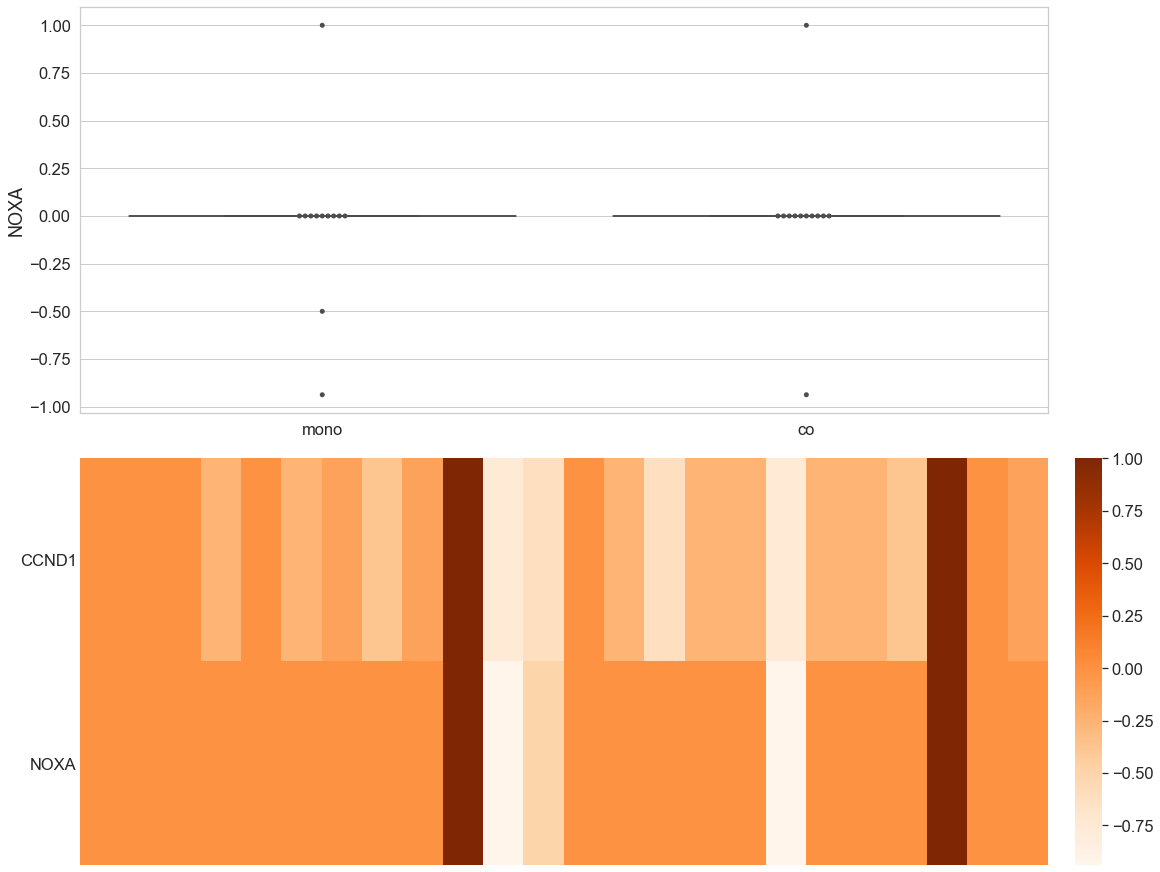

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
boxplots = [formatted_boxplot_data_noxa,
           ]

boxplots_labels = ["NOXA"]

# Set plot style
sns.set(font_scale=1.5,style="whitegrid")
# Instantiate figure
fig = plt.figure(constrained_layout=True,figsize=(16,12))

# Set figure axes
num_plots = 2
gs = fig.add_gridspec(num_plots, 1)

for b in range(num_plots-1):
    print(b)
    # Fill first subplot
    fig.add_subplot(gs[b,0])
    # Plot the orbital period with horizontal boxes
    sns.boxplot(x="label", y="data", data=boxplots[b],fliersize=0)
    # Add in points to show each observation
    sns.swarmplot(x="label", y="data", data=boxplots[b],
                  size=5, color=".3", linewidth=0)
    plt.ylabel(boxplots_labels[b])
    plt.xlabel("")

ax = fig.add_subplot(gs[num_plots-1, 0])
sns.heatmap(venetoclax_markers,cmap = "Oranges",square=False)
ax.set_yticklabels(labels = venetoclax_markers.index,rotation=0)
ax.set_xticklabels(labels="",FontSize=0)
ax.tick_params(axis='both', which='both', length=0)

#plt.savefig(os.path.join(resultsFolder,"t(11;14)_BCL2_genes_figure.pdf"),bbox_inches="tight")